代币总供应量: 10000000000


内盘初始价格: 1e-09
内盘最终价格: 1e-08
内盘代币供应量: 8500000000
内盘打满成本（BNB）: 33.15206903140712
内盘最终市值（BNB）: 100.0


流动性池代币数量: 1500000000
流动性池初始价格: 2.2101379354271417e-08
流动性池价格计算初始市值（BNB）: 221.01379354271415


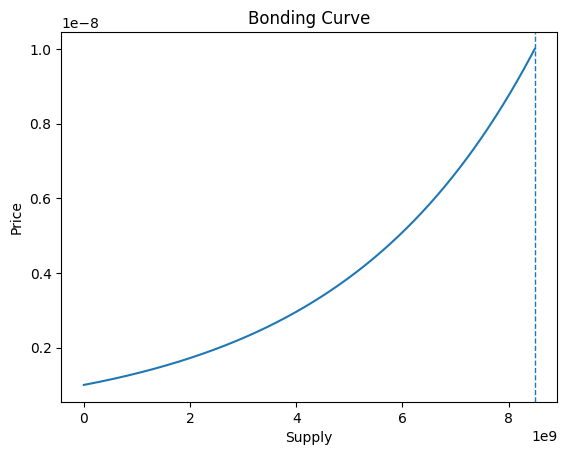

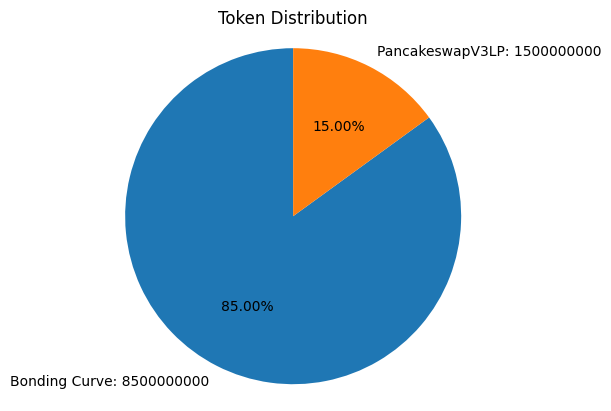

In [2]:
"""
Author: yoosoftcc
Time: 2025/02/17 18:02:30
Desc: 联合曲线示例
"""

import numpy as np
from matplotlib import pyplot

"""
目前项目采用的是比较广泛应用的 Discrete bonding curve （DBC 模型，离散型联合曲线），即带价格阶梯的联合曲线
指数型 DBC 模型也是 pumpfun 等平台最常见的实现，https://blog.slerf.tools/solana-pump-fun-and-bonding-curve/

常见函数类型：
    线性函数：恒定金额做市商
    指数函数：恒定市场做市商
    Log 函数：恒定均值做市商
    变异函数：恒定交换不变性做市商

示例代码中的可配置参数
价格/内盘供应量 曲线：
    可配置参数 - startingPrice，targetPrice， stepCount，targetMcap
代币分配饼图：
    可配置参数 - maxSupply
"""

# launch fee (1BNB)
launch_fee = 0

# 初始价格（BNB单位）
startingPrice = 0.000000001

# 1000 个价格阶梯
stepCount = 1000

# 内盘目标价格 （BNB单位）
targetPrice = 0.00000001

# # 内盘目标市值（BNB单位）
# targetMcap = 100

# 最大供应量：10B
maxSupply = 10_000_000_000
maxSupplyAtCurve = 8_500_000_000 

# 允许创建者分配 token，即创建同时捆版买入，默认为 0
creatorAllocation = 0

# 每个价格阶梯对应 x 轴供应量的跨度
deltaX = (maxSupplyAtCurve - creatorAllocation) / stepCount

# x 轴总跨度
totalX = maxSupplyAtCurve - creatorAllocation - deltaX

# y 轴总跨度
totalY = targetPrice - startingPrice

percentageIncrease = pow(targetPrice / startingPrice, 1 / (stepCount - 1))
index = np.arange(0, stepCount)

# x 轴供应量
x = index * deltaX + creatorAllocation

# y 轴价格
y = [startingPrice]

# 储备代币数量 BNB
reserve = 0
for i in range(1, len(index)):
    prevY = y[i - 1]
    currY = prevY * percentageIncrease
    y.append(currY)
    reserve += deltaX * prevY

print('代币总供应量:', maxSupply)
print('\n')
print('内盘初始价格:', startingPrice)
print('内盘最终价格:', targetPrice)
print('内盘代币供应量:', maxSupplyAtCurve)
print('内盘打满成本（BNB）:', reserve)
print('内盘最终市值（BNB）:', maxSupply * targetPrice)
print('\n')
initial_lp_price = (reserve - launch_fee) / (maxSupply - maxSupplyAtCurve)
print('流动性池代币数量:', maxSupply - maxSupplyAtCurve)
print('流动性池初始价格:', initial_lp_price)
print('流动性池价格计算初始市值（BNB）:', maxSupply * initial_lp_price)

# style 为 plain 即 禁用科学计数法格式，但有些长
ax = pyplot.gca()
ax.ticklabel_format(style='sci', axis='y')
ax.ticklabel_format(style='sci', axis='x')

pyplot.title("Bonding Curve")
pyplot.xlabel("Supply")
pyplot.ylabel("Price")
pyplot.plot(x, y)
pyplot.axvline(maxSupplyAtCurve, linewidth=1, linestyle='--')
pyplot.show()

# 价格需要确保从内盘平移至 LP池，即价格模型从 bonding curve 转变为 x*y=k AMM
# 代币分配见饼图
lpBNB = reserve - launch_fee
lpToken =  maxSupply - maxSupplyAtCurve
pyplot.pie([maxSupplyAtCurve, lpToken],
           labels=[f"Bonding Curve: {int(maxSupplyAtCurve)}", f"PancakeswapV3LP: {int(lpToken)}"], autopct='%1.2f%%', startangle=90)
pyplot.axis('equal')
pyplot.title('Token Distribution')
pyplot.show()